# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)
pd.set_option('max_rows', 100)

# Dataset Overview

this project is about rock density prediction based on the signal strenght

In [2]:
df = pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.shape

(300, 2)

In [10]:
df.isnull().sum()

Signal     0
Density    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [5]:
# rename columns
df.columns=['Signal','Density']

# Data Exploration

<AxesSubplot:xlabel='Signal', ylabel='Density'>

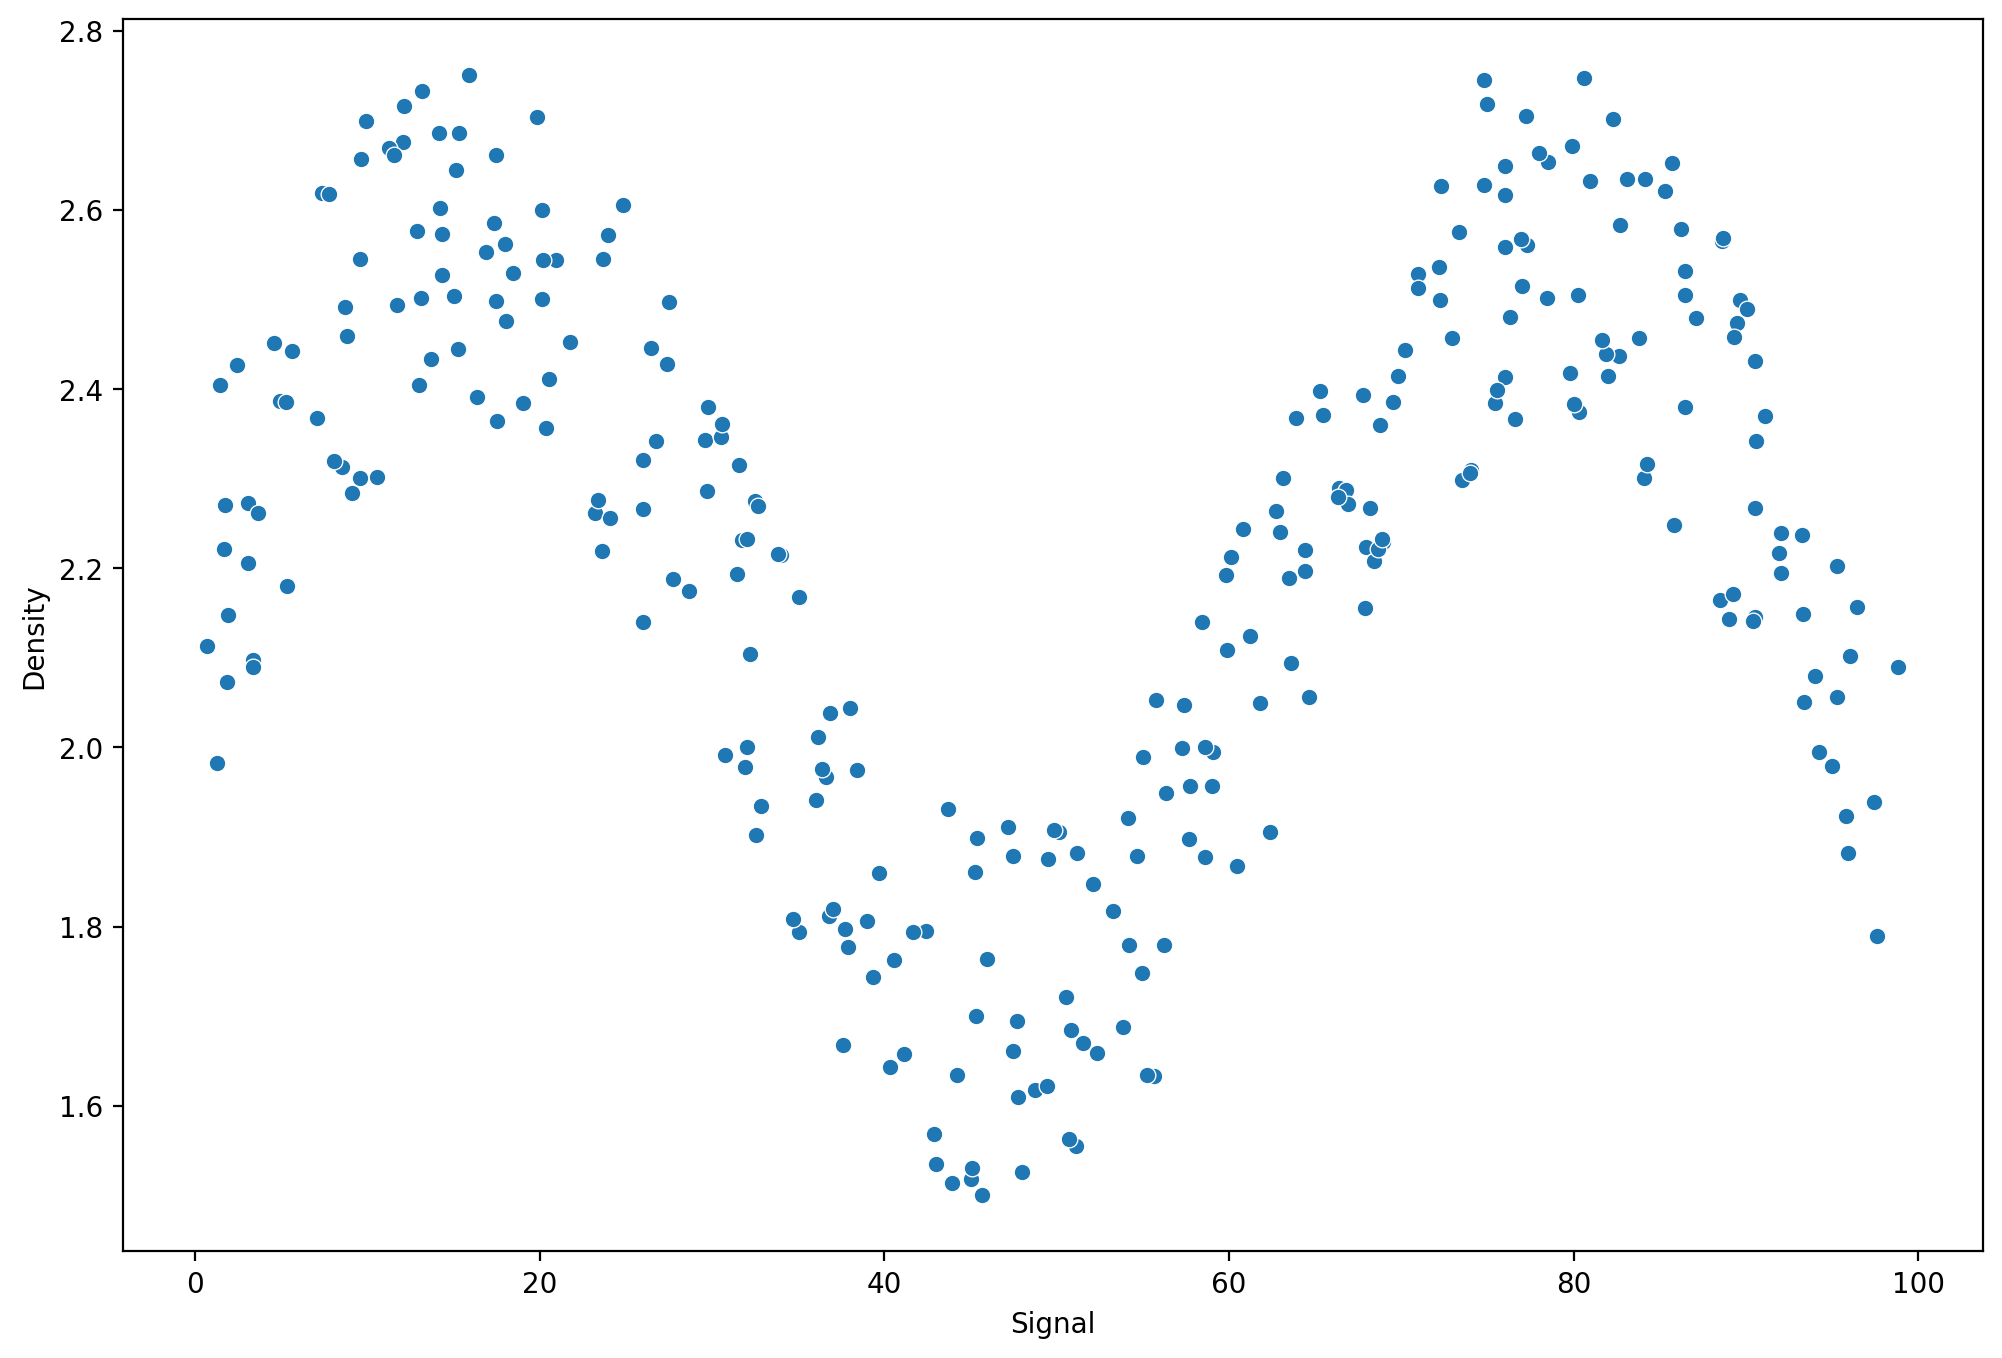

In [8]:
# plot using scatterplot
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Signal,300.0,49.725766,28.341792,0.700227,25.685798,50.602886,74.854294,98.831658
Density,300.0,2.225063,0.314512,1.500000,1.987830,2.268597,2.476944,2.750000


# Splitting the Data

In [12]:
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Modeling

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# define model
lr_model = LinearRegression()

# fit model
lr_model.fit(X_train,y_train)

# predict
lr_preds = lr_model.predict(X_test)

# evaluation using rsmse
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

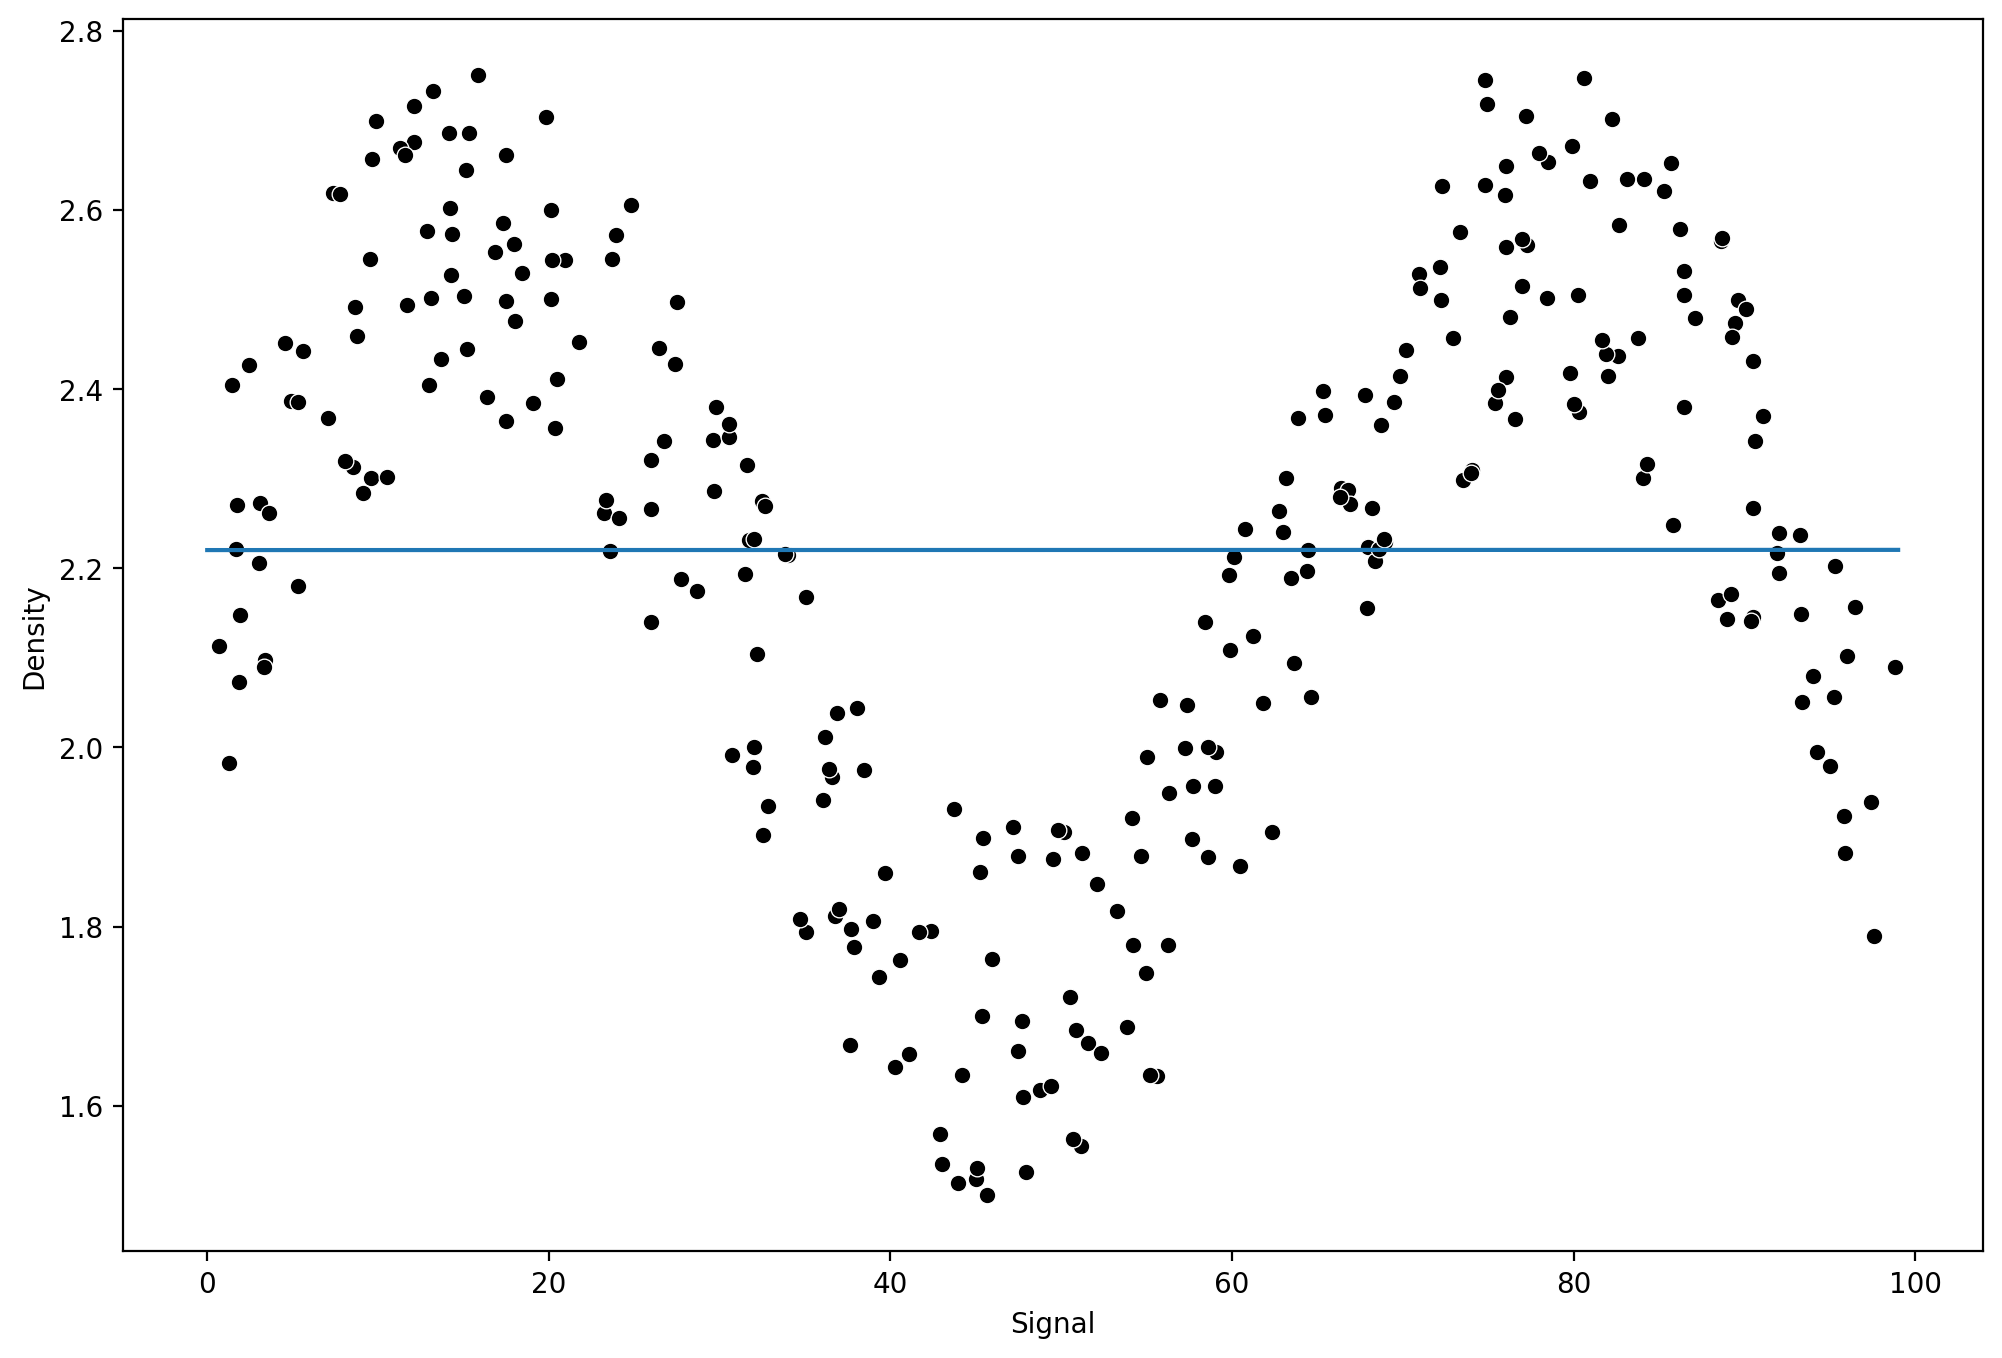

In [23]:
# visualization
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df,color='black')

# use only 0-100
signal_range = np.arange(0,100)
lr_output = lr_model.predict(signal_range.reshape(-1,1))

plt.plot(signal_range,lr_output)

## Polynomial Regression

In [25]:
model = LinearRegression()

In [26]:
# create a function to help run models
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.2570051996584629


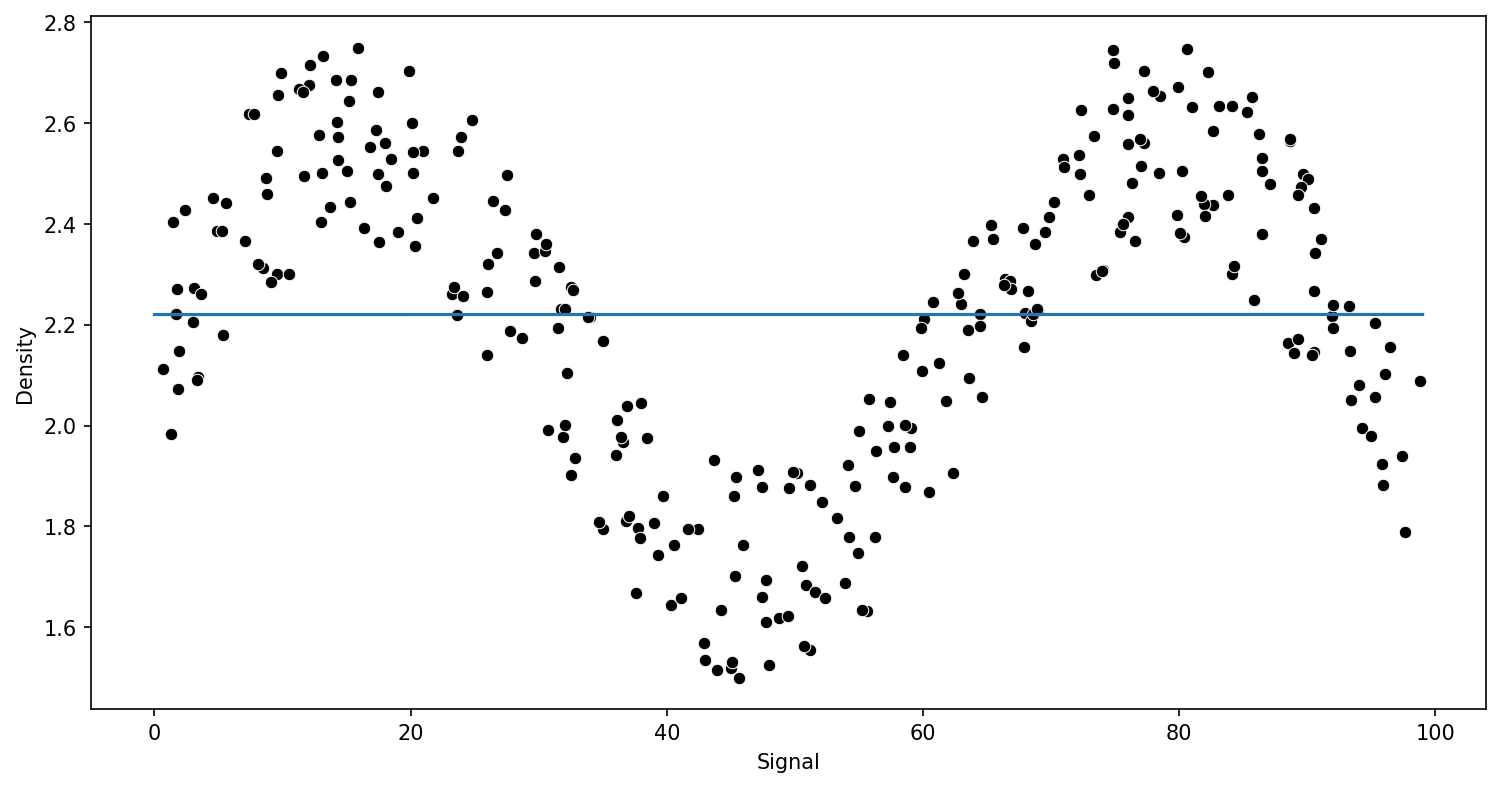

In [27]:
run_model(model,X_train,y_train,X_test,y_test)

RMSE : 0.2817309563725583


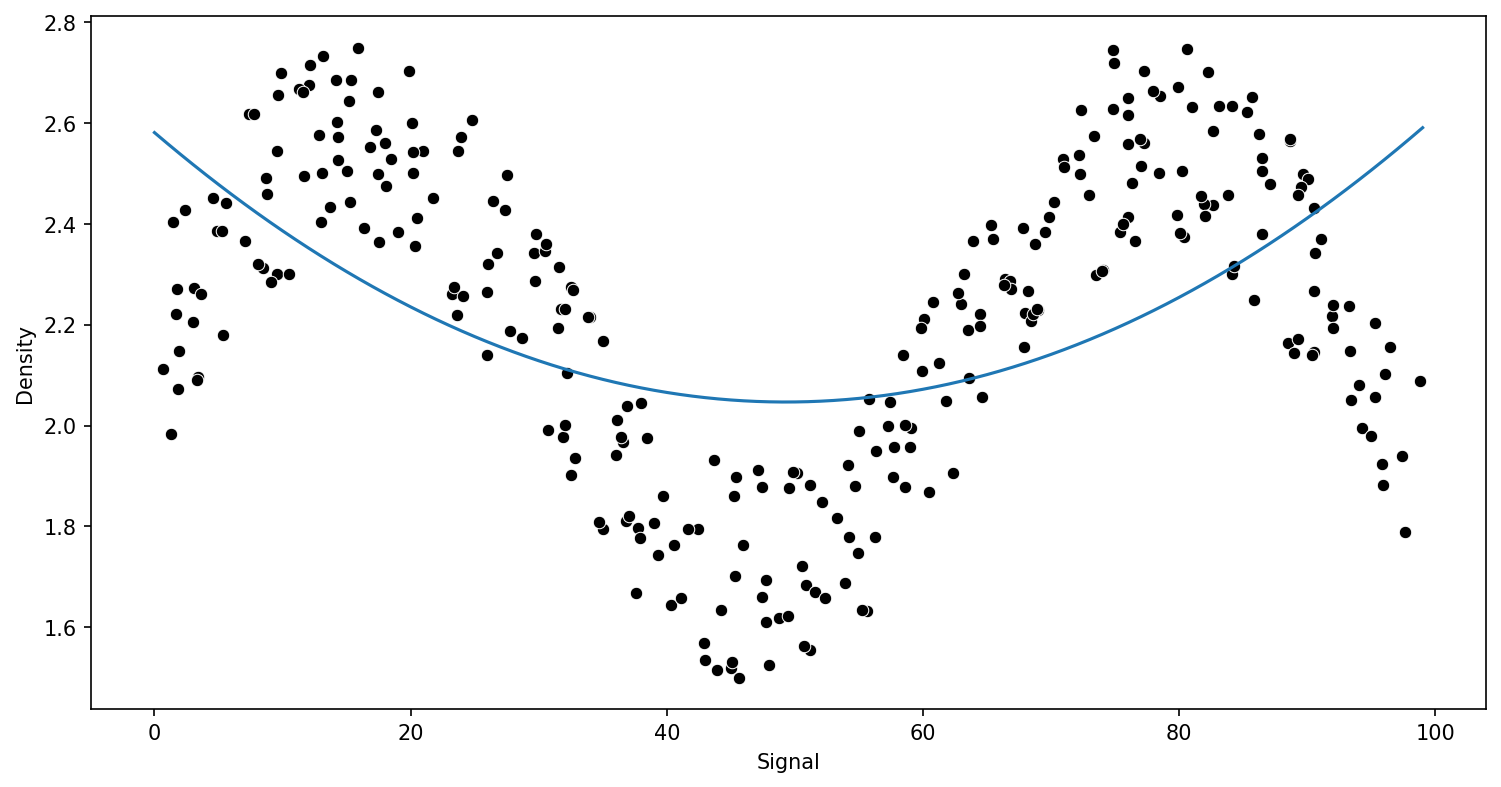

In [28]:
# Pipeline for Poly Orders
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# create pipleline for order = 2
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())

run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.14034216306925817


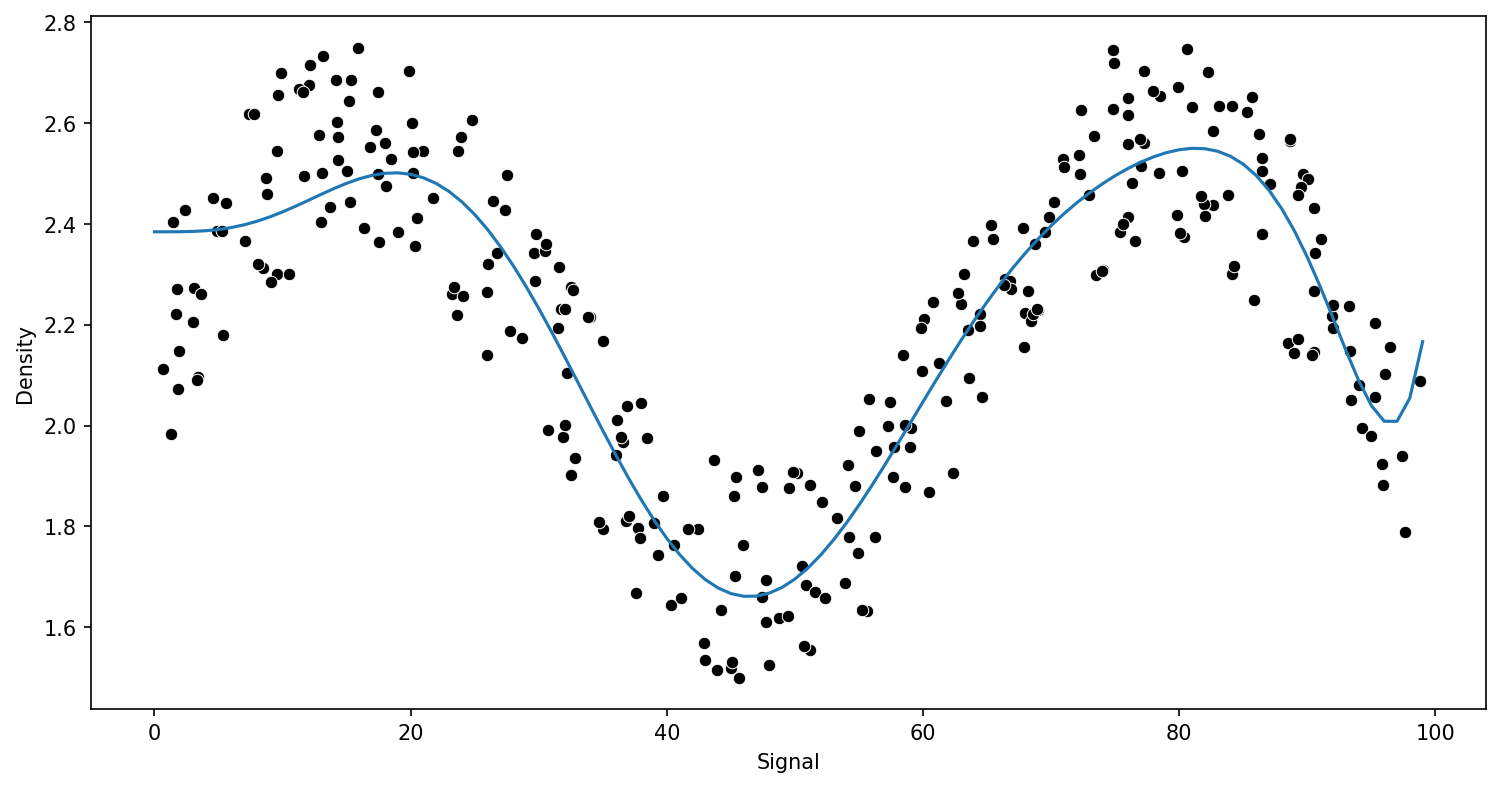

In [29]:
# create pipleline for order = 10
pipe = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

## KNN Regression

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


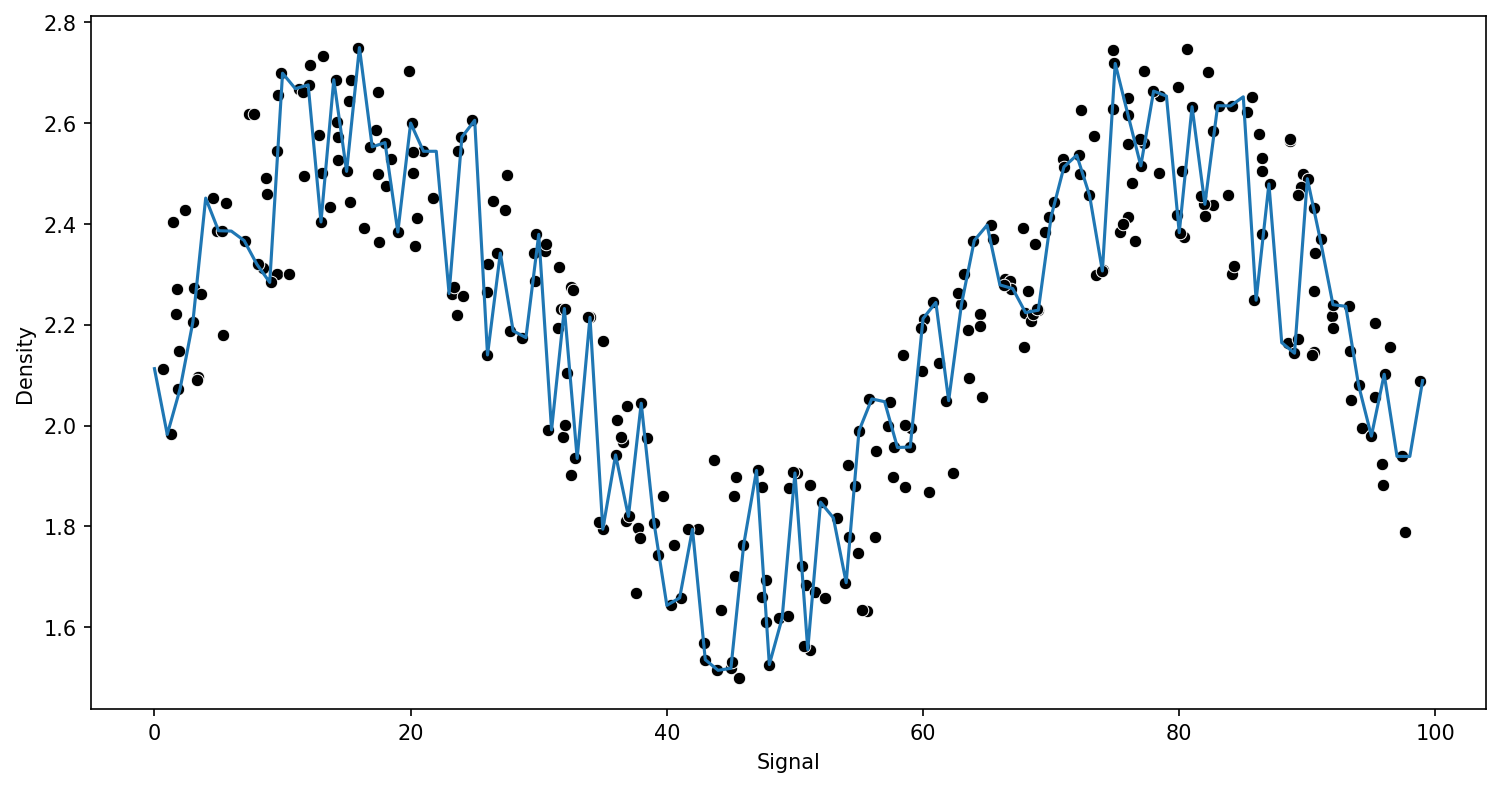

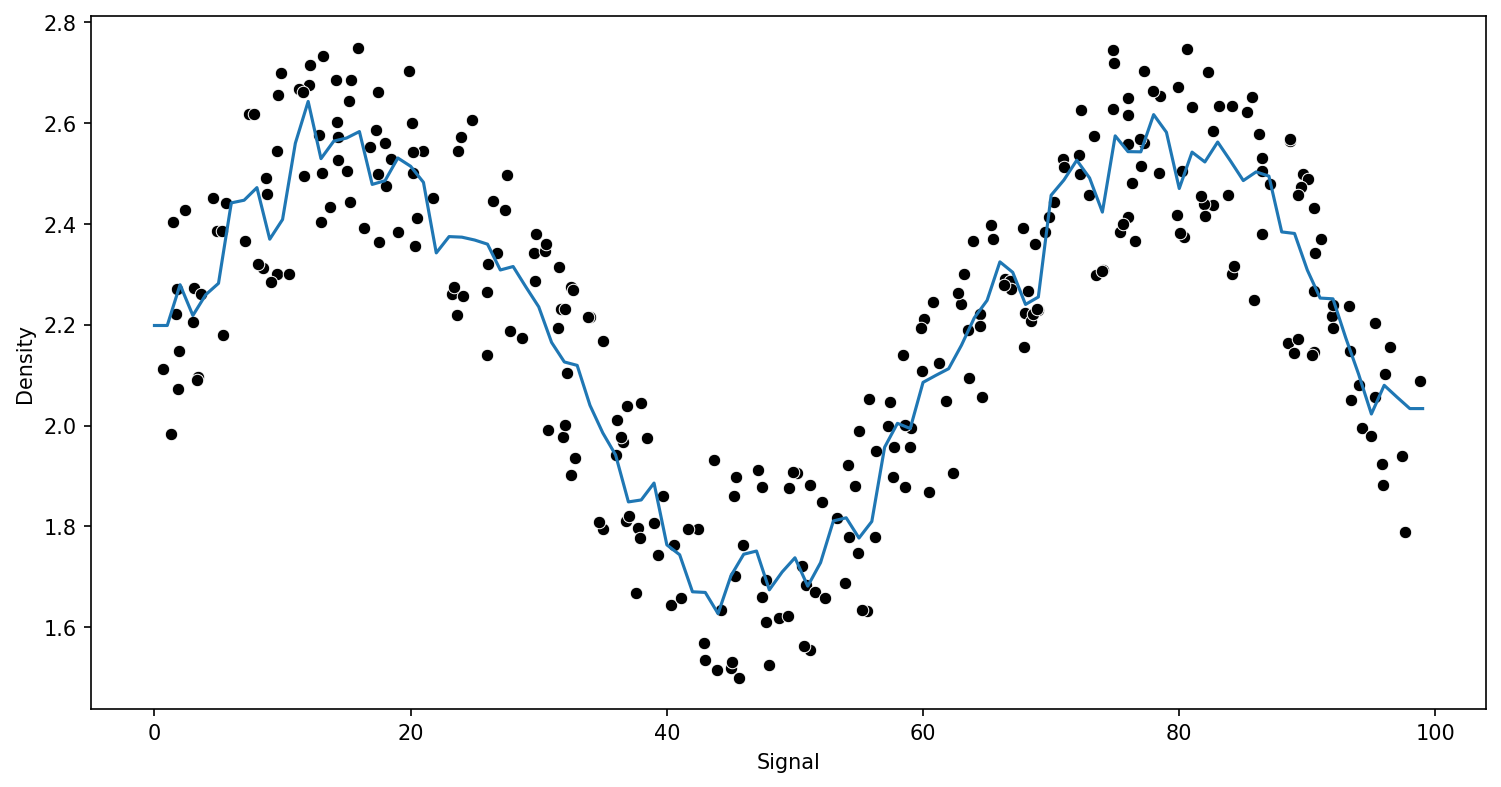

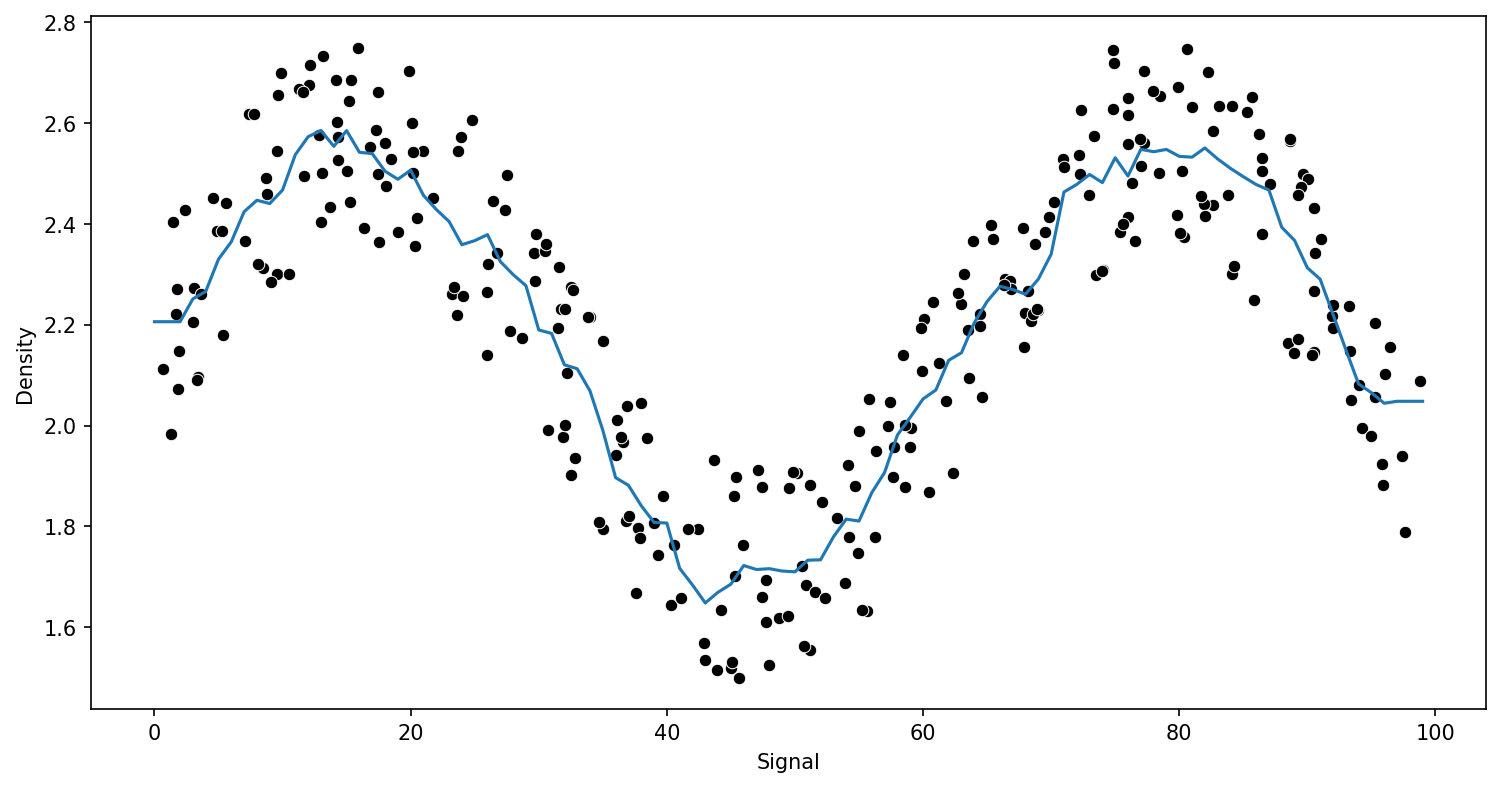

In [30]:
from sklearn.neighbors import KNeighborsRegressor

preds = {}
k_values = [1,5,10]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

## Decision Tree Regression

RMSE : 0.1523487028635337


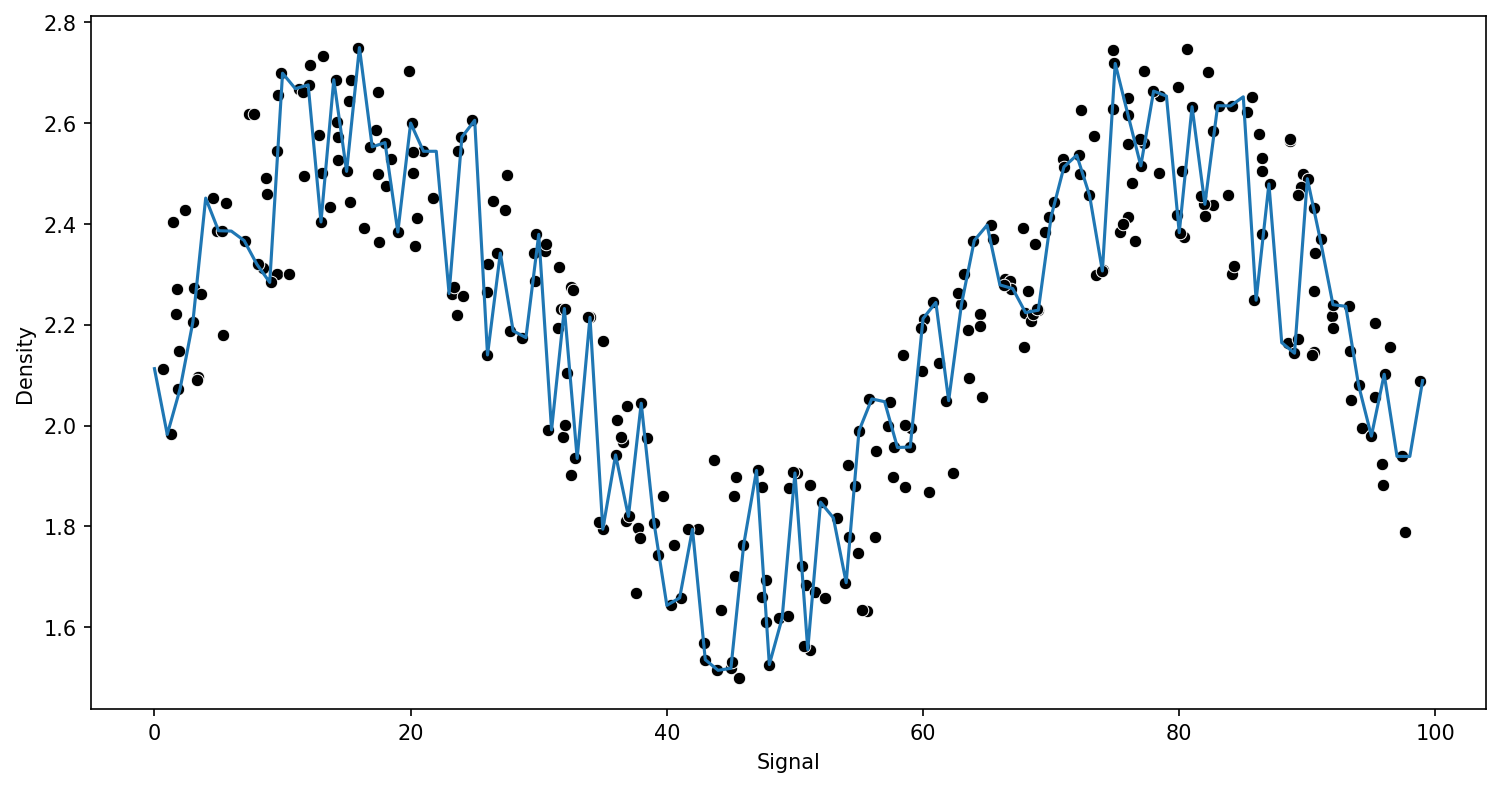

In [31]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Support Vector Regression

RMSE : 0.12646999302046696


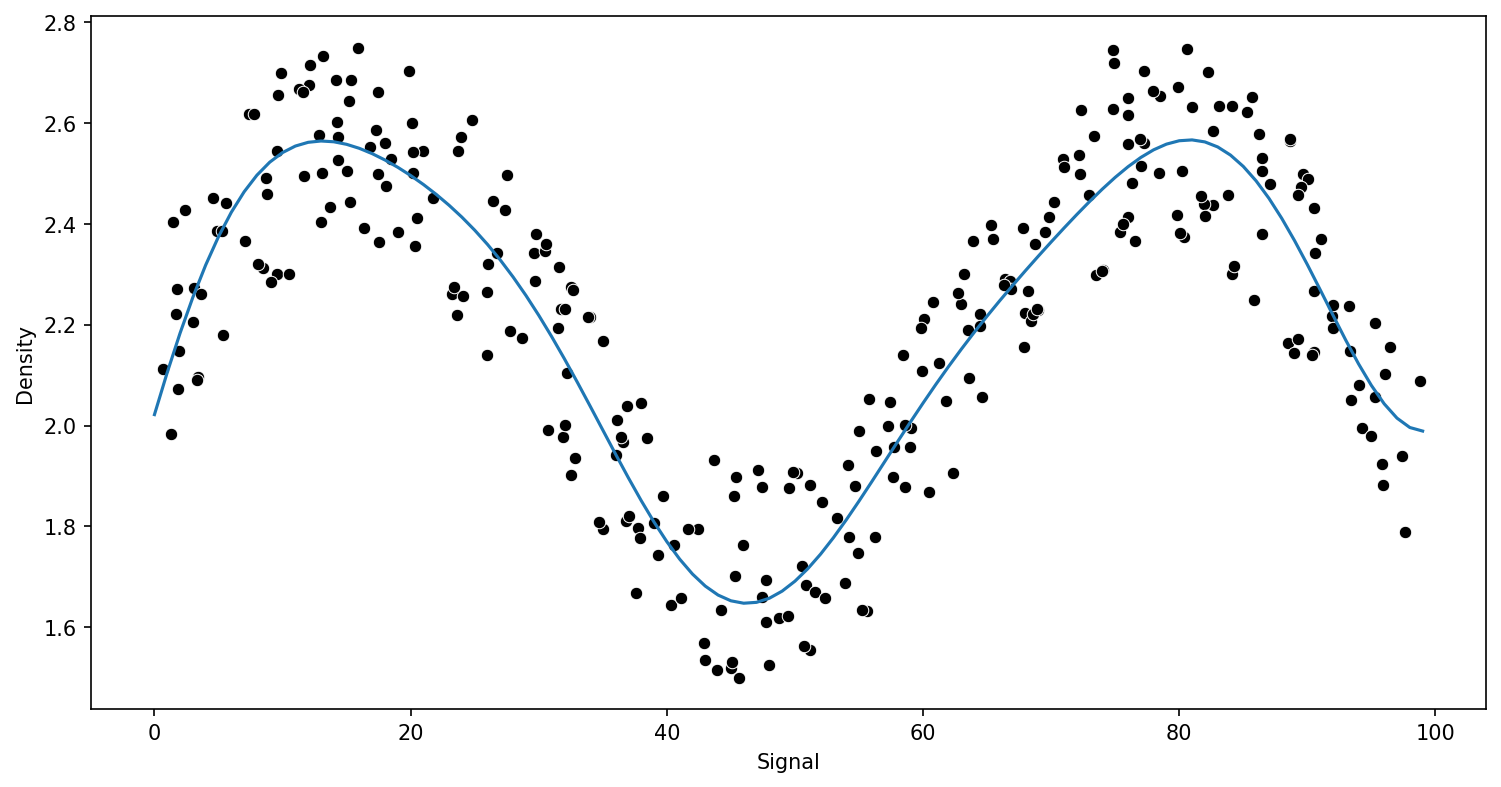

In [32]:
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

grid = GridSearchCV(svr,param_grid)

run_model(grid,X_train,y_train,X_test,y_test)

In [33]:
grid.best_estimator_

SVR(C=1000)

## Random Forest Regression

RMSE : 0.12965220882688797
RMSE : 0.13668775113695036
RMSE : 0.13235581171500616


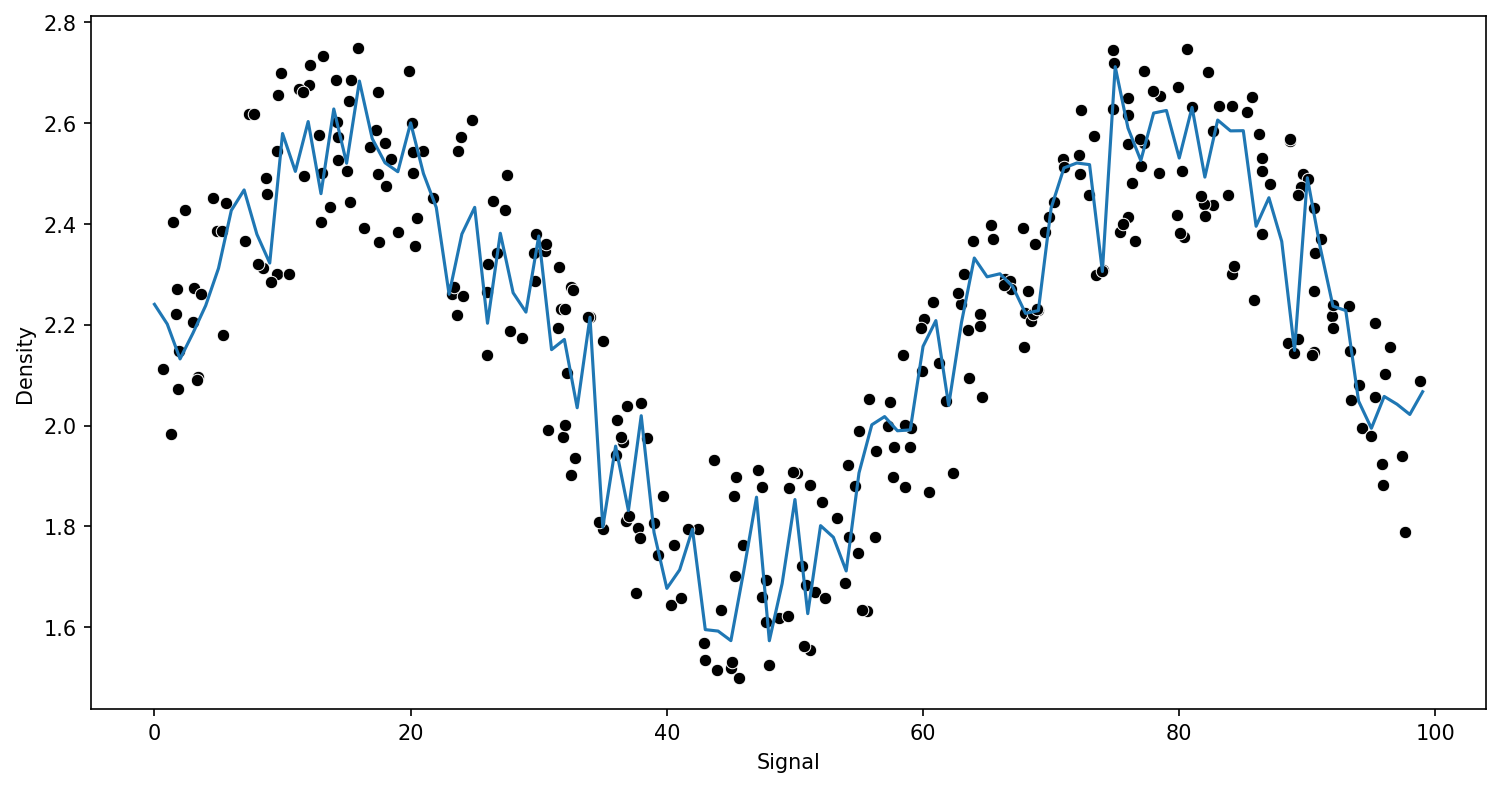

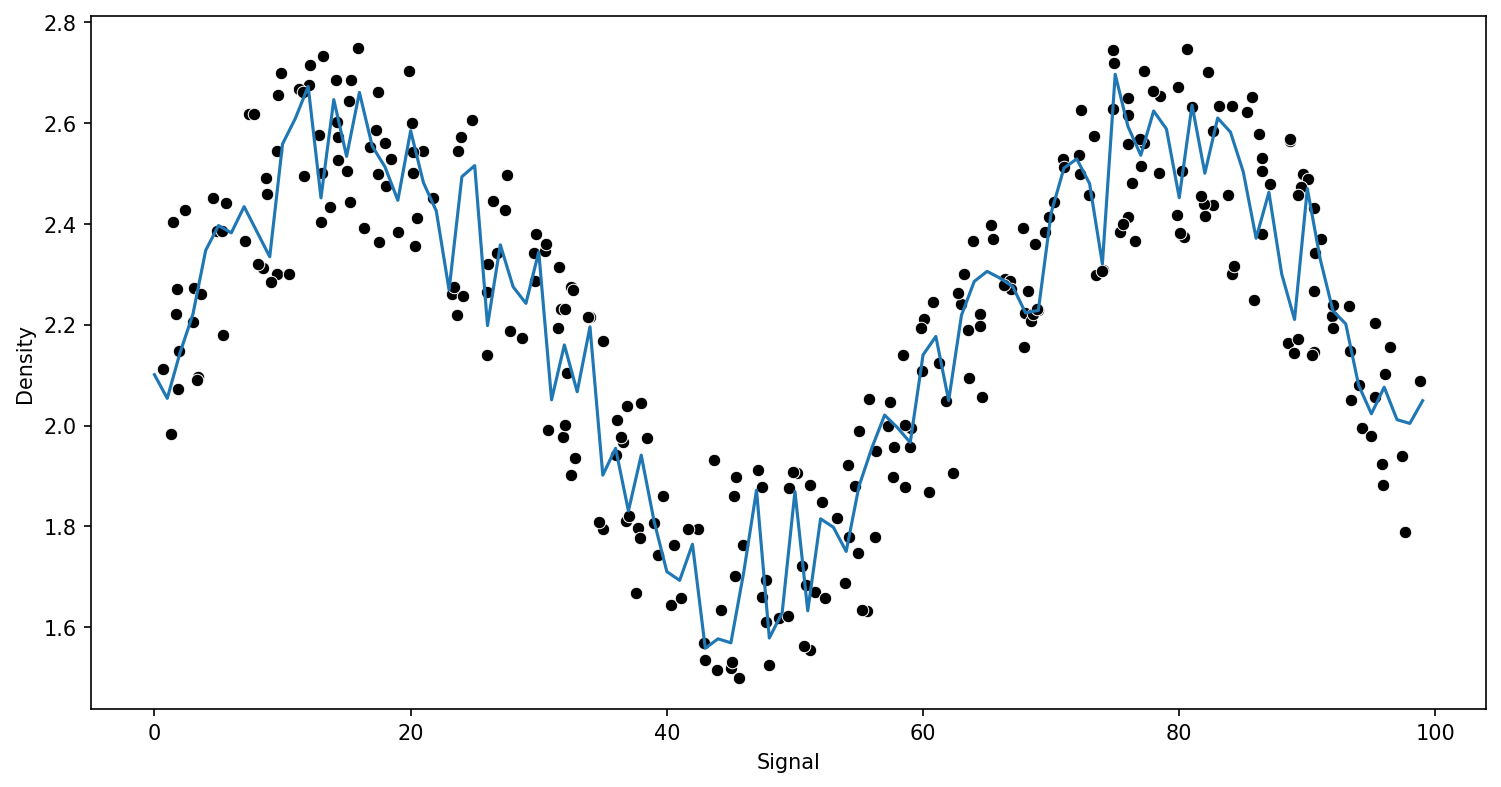

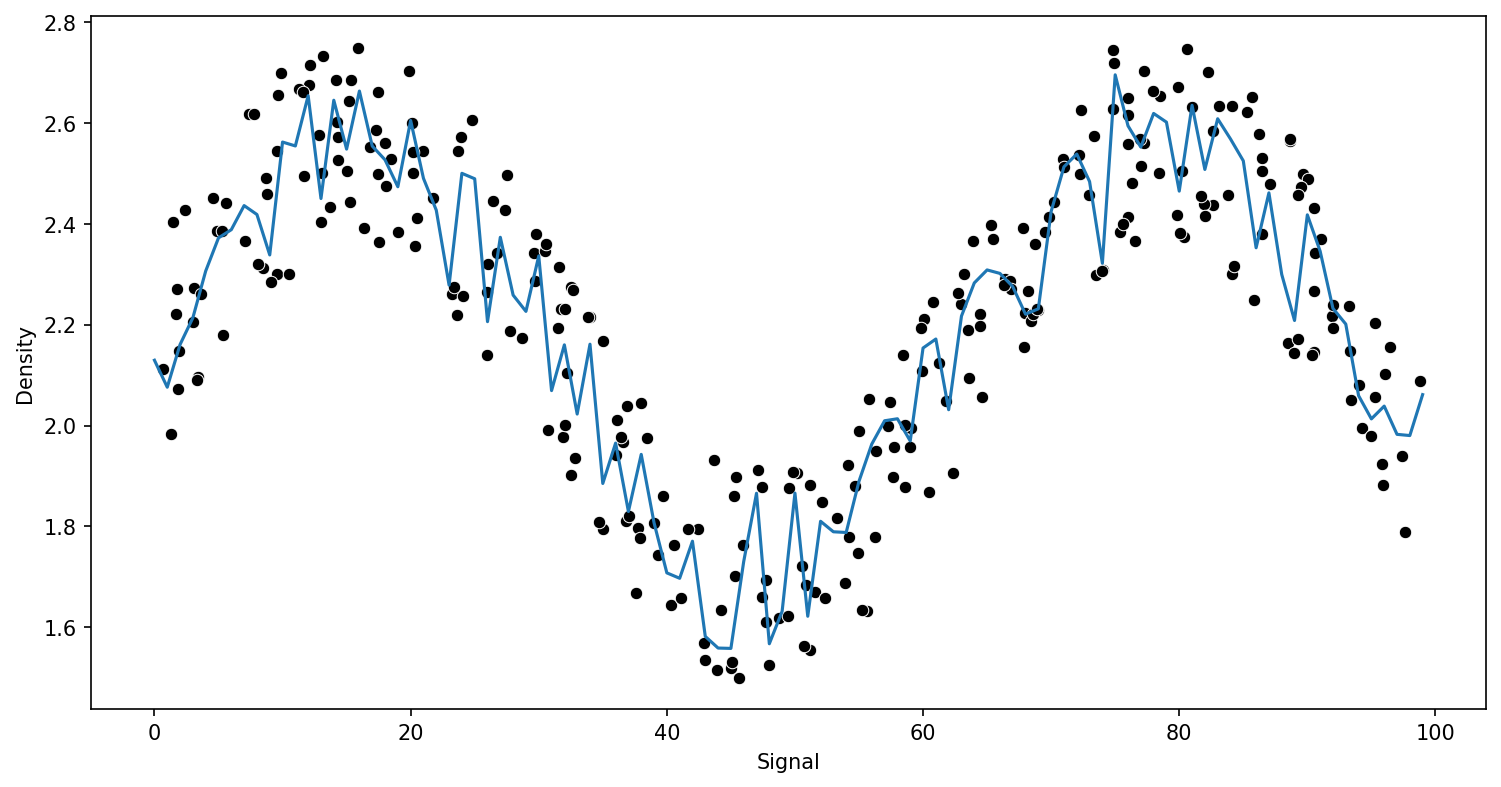

In [34]:
from sklearn.ensemble import RandomForestRegressor

trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## Gradient Boosting

RMSE : 0.13294148649584667


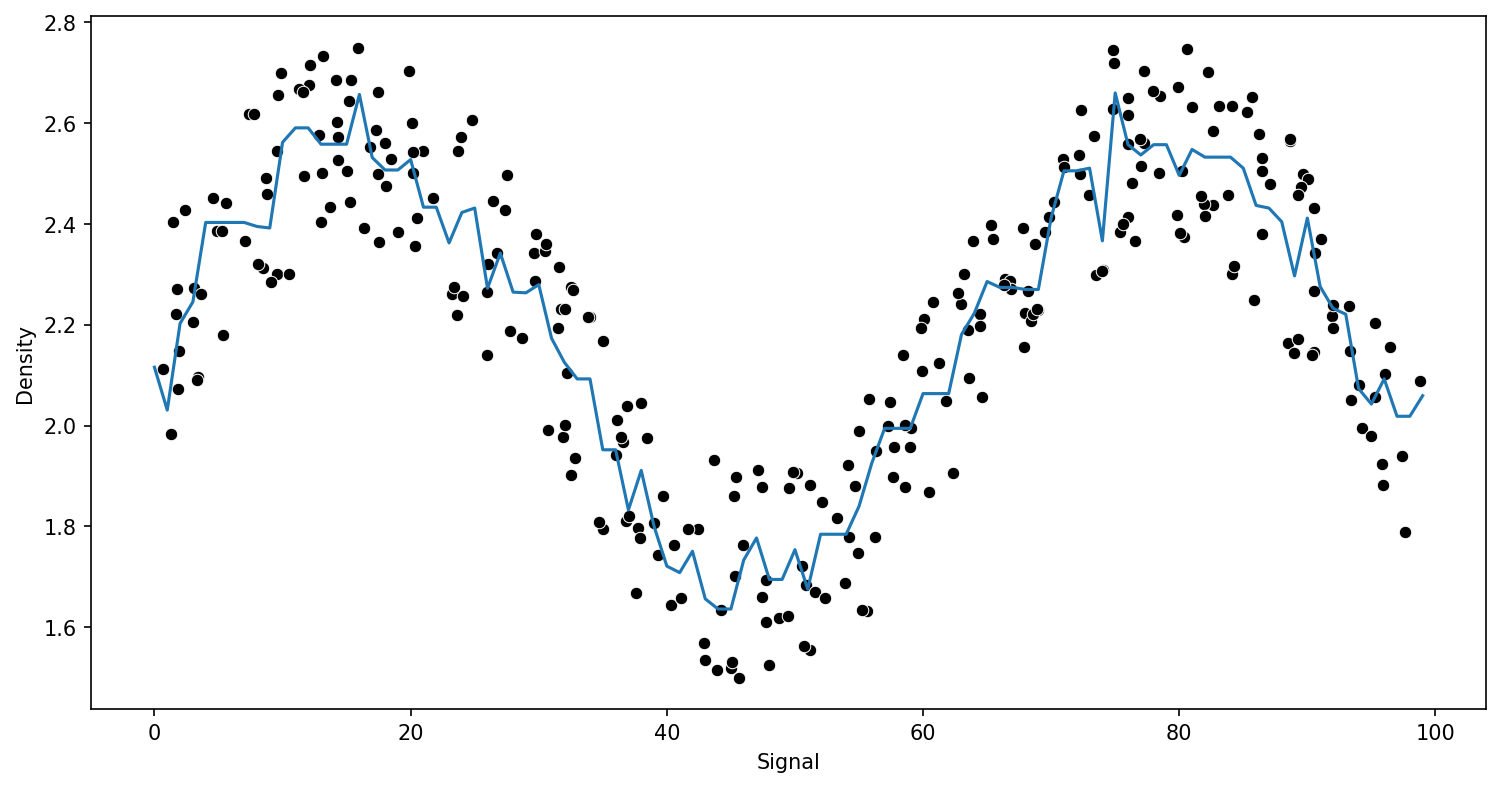

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

   
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

## Adaboost

RMSE : 0.13294148649584667


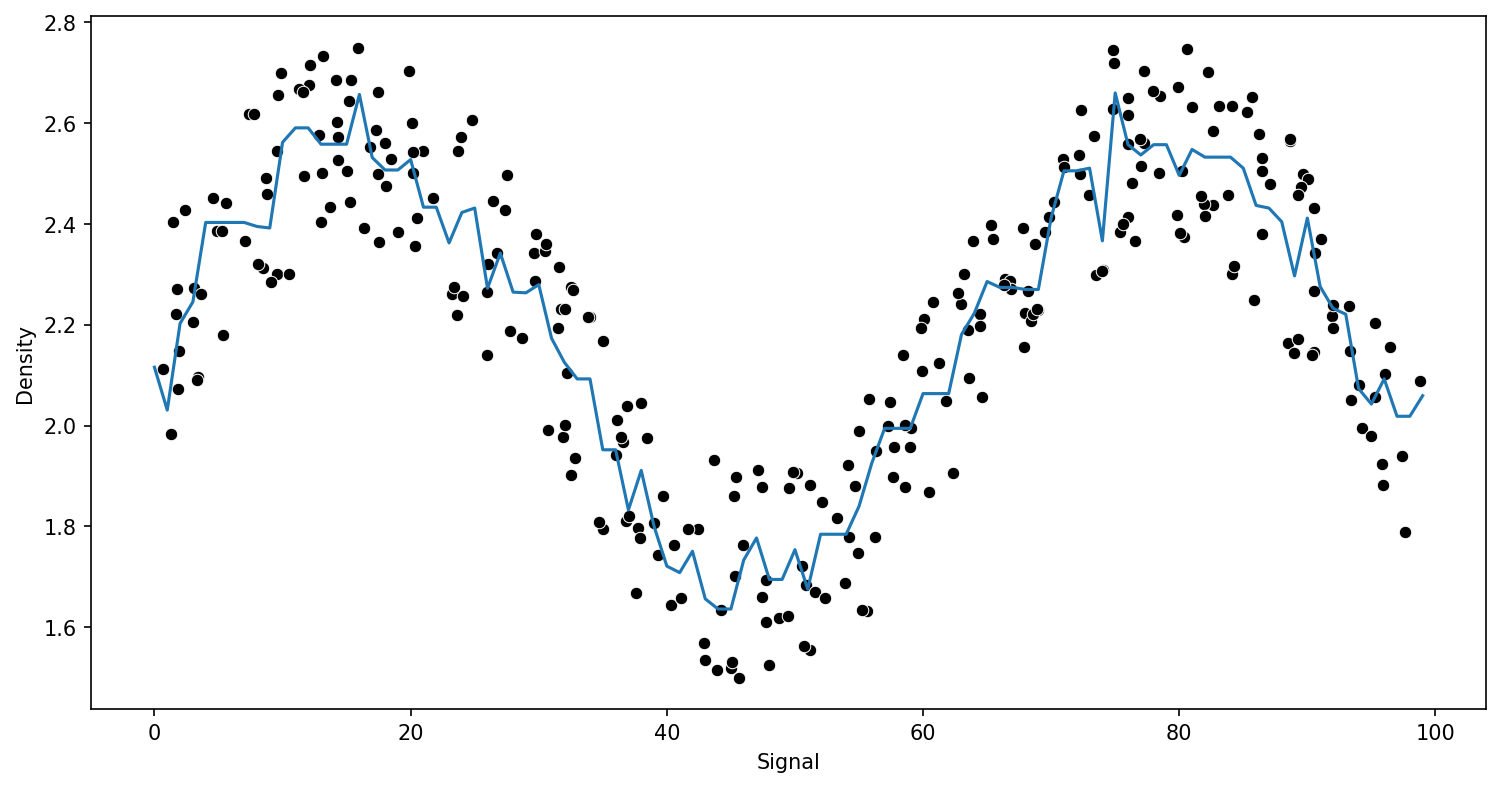

In [37]:
from sklearn.ensemble import AdaBoostRegressor

model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)